In [219]:
import numpy as np
import pandas as pd
from skimage.transform import (hough_line, hough_line_peaks)
import cv2
import matplotlib.pyplot as plt

In [220]:
img=cv2.imread("./Dataset/clock_1.png",0)

In [221]:
img.shape

(225, 225)

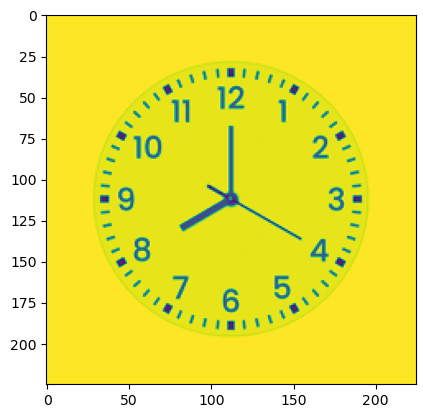

In [222]:
plt.imshow(img)
plt.show()

#### Algorithm for canny Edge detection

1. Noise Reduction : It is used for the noise reduction from the image. For this it uses Gaussian filter (5*5).
2. Finding Intensity Gradient of the Image (Direction in which, intensity of the pixel value change drastically).
3. Non-maximum Suppression
4. Hysteresis Thresholding

In [223]:
edges = cv2.Canny(img,50,700,apertureSize=3,L2gradient =True)

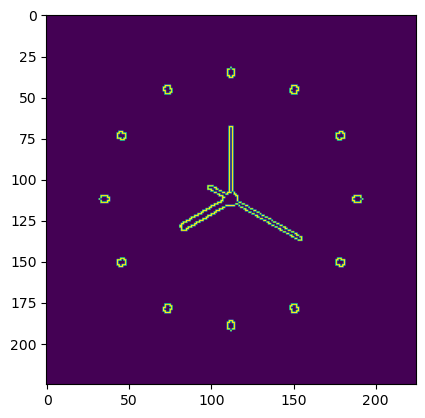

In [215]:
plt.imshow(edges)
plt.show()

In [182]:
# Generating various point
tested_angles = np.linspace(-np.pi/2, np.pi / 2, 180)

In [183]:
hspace, theta, dist = hough_line(edges, tested_angles)

In [184]:
hspace.shape, theta.shape, dist.shape

((639, 180), (180,), (639,))

In [185]:
h, angle, distance = hough_line_peaks(hspace, theta, dist,num_peaks =3)

In [186]:
angles = [a*180/np.pi for a in angle]

In [187]:
angles

[-59.832402234636874, 0.5027932960893821, 59.832402234636874]

In [188]:
angle_difference = np.max(angles) - np.min(angles)

In [189]:
np.max(angles)

59.832402234636874

In [190]:
angle_difference

119.66480446927375

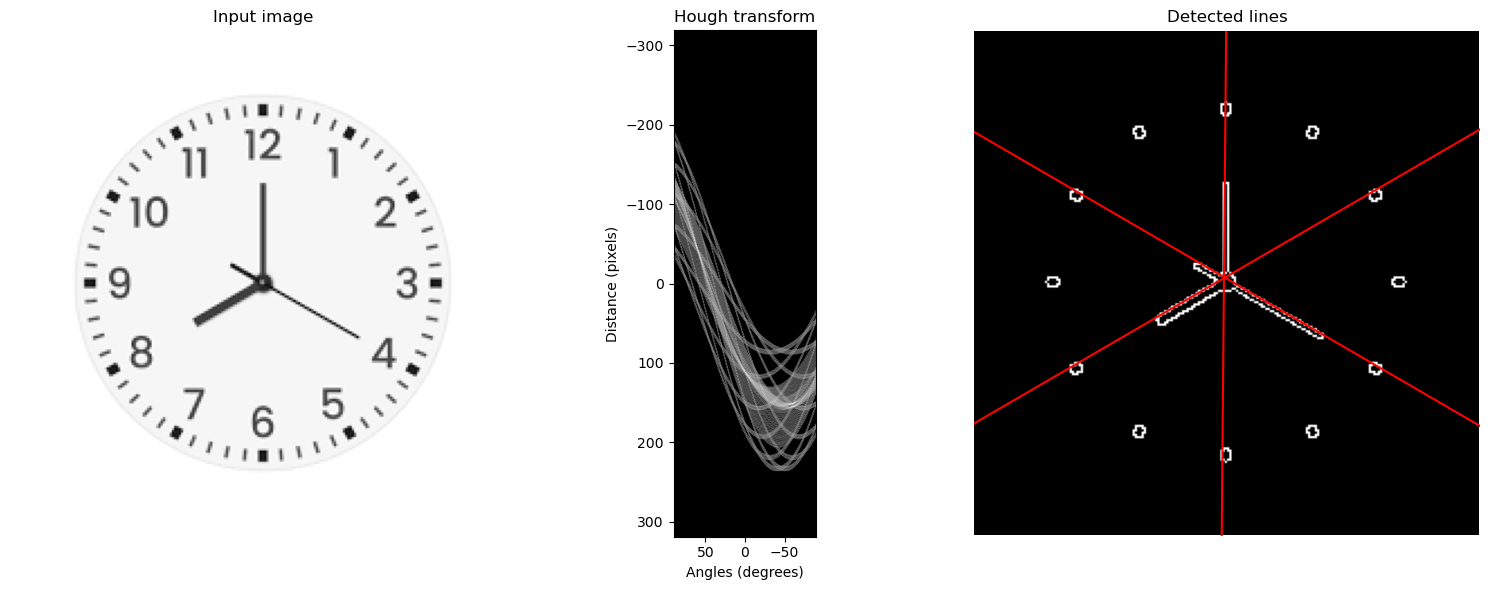

In [191]:
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(edges, cmap='gray')

origin = np.array((0, img.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()


# 2nd approach

In [192]:
lines = cv2.HoughLines(edges, 1, np.pi / 180,40)

In [193]:
print(type(lines))

<class 'numpy.ndarray'>


In [197]:
print(lines.shape)

(9, 1, 2)


In [198]:
for line in lines:
    rho,theta=line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    x1=int(x0 + 100*(-b))
    y1=int(y0 + 100*(a))
    x2=int(x0 - 100*(-b))
    y2=int(y0-100*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


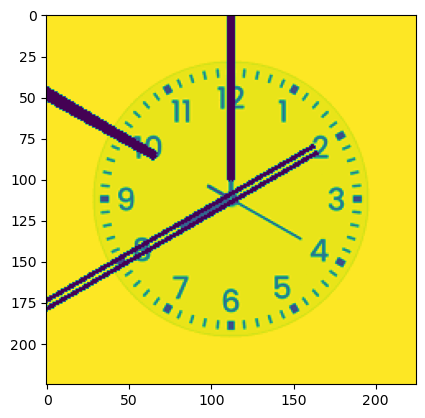

In [196]:
plt.imshow(img)
plt.show()

# 3rd methode

In [224]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180,20)

In [225]:
for line in lines:
    x0,y0,x1,y1=line[0]
    cv2.line(img,(x0,y0),(x1,y1),(0,0,255),2)

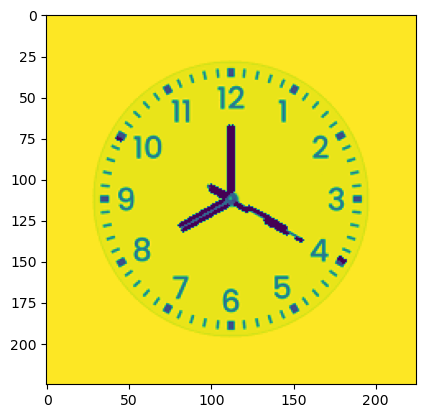

In [226]:
plt.imshow(img)
plt.show()